In [142]:
!pip install --upgrade pip

In [143]:
!pip install opencv-python matplotlib

In [144]:
import tensorflow as tf
import os

In [145]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [146]:
len(gpus)

1

In [147]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
data_dir = '/content/drive/MyDrive/data'
os.listdir(data_dir)

['sad_people', 'happy_people', 'test']

In [150]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [151]:
data_dir

'/content/drive/MyDrive/data'

In [152]:
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [153]:
image_exts[2]

'png'

In [154]:
#os.listdir(os.path.join(data_dir, 'happy_people'))

In [155]:
img = cv2.imread(os.path.join(data_dir, 'happy_people', '_106067414_2.jpg'))

In [156]:
img

array([[[185, 180, 181],
        [186, 181, 182],
        [186, 181, 182],
        ...,
        [236, 227, 224],
        [236, 227, 224],
        [236, 227, 224]],

       [[186, 181, 182],
        [186, 181, 182],
        [187, 182, 183],
        ...,
        [236, 227, 224],
        [236, 227, 224],
        [236, 227, 224]],

       [[187, 182, 183],
        [187, 182, 183],
        [187, 182, 183],
        ...,
        [236, 227, 224],
        [236, 227, 224],
        [236, 227, 224]],

       ...,

       [[203, 203, 203],
        [204, 204, 204],
        [203, 203, 203],
        ...,
        [133, 152, 160],
        [145, 163, 180],
        [112, 129, 148]],

       [[199, 199, 199],
        [202, 202, 202],
        [203, 203, 203],
        ...,
        [124, 143, 151],
        [133, 151, 168],
        [116, 133, 152]],

       [[202, 202, 202],
        [206, 206, 206],
        [208, 208, 208],
        ...,
        [135, 154, 162],
        [126, 144, 161],
        [120, 137, 156]]

In [157]:
type(img)

numpy.ndarray

In [158]:
img.shape

(549, 976, 3)

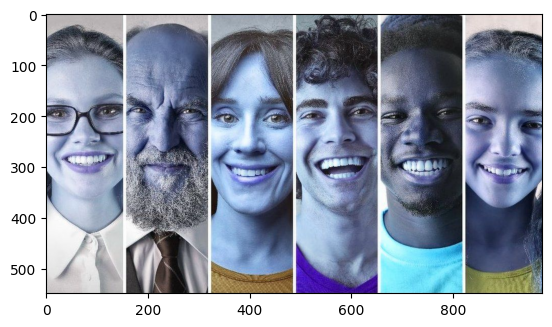

In [159]:
plt.imshow(img)

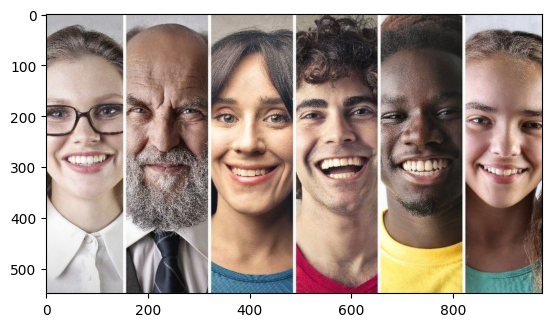

In [160]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<function matplotlib.pyplot.show(close=None, block=None)>

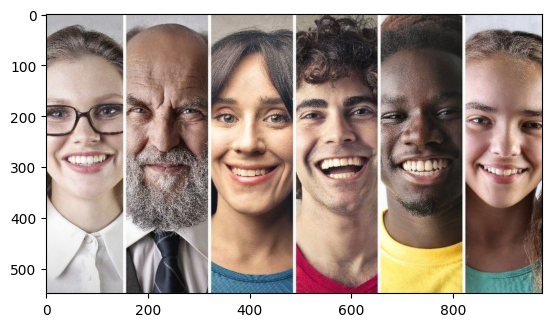

In [161]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [162]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image is not in the extensions list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))
      # os.remove(image_path)

In [163]:
tf.data.Dataset??

In [164]:
tf.keras.utils.image_dataset_from_directory??

In [165]:
import numpy as np
from matplotlib import pyplot as plt

In [166]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 253 files belonging to 3 classes.


In [167]:
data_iterator = data.as_numpy_iterator()

In [168]:
data_iterator

In [169]:
# Get another batch from the iterator
batch = data_iterator.next()

In [170]:
batch[1].shape

(32,)

In [171]:
len(batch)

2

In [172]:
batch[0].shape

(32, 256, 256, 3)

In [173]:
# Class 0 = Happy People
# Class 1 = Sad People
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

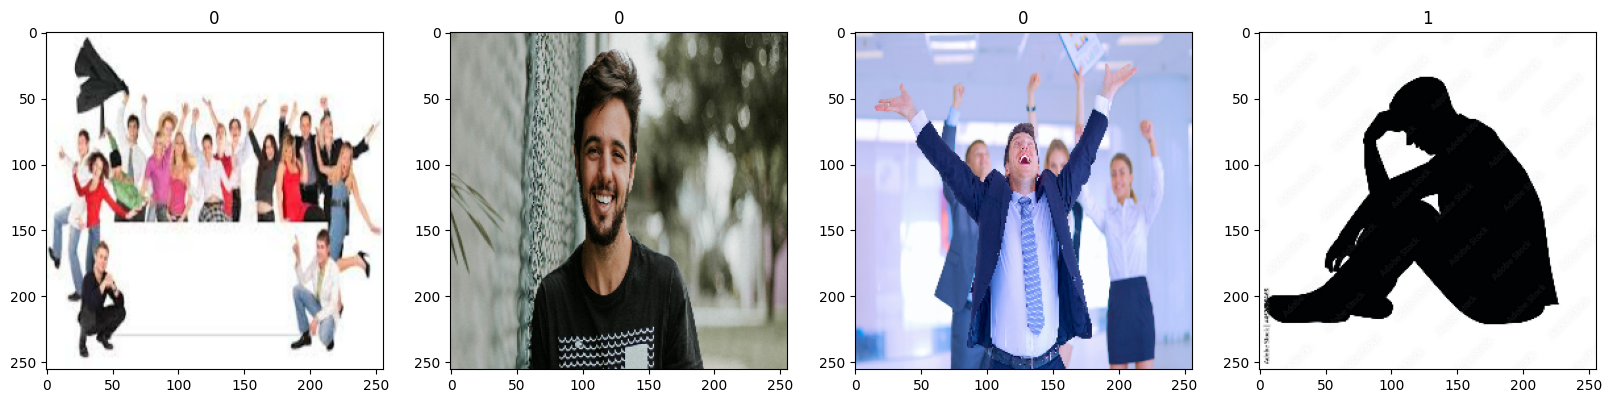

In [174]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [175]:
data = data.map(lambda x, y: (x/255, y))

In [176]:
scaled_iterator = data.as_numpy_iterator()

In [177]:
batch = scaled_iterator.next()

In [178]:
batch[0].max()

1.0

In [179]:
batch[0].min()

0.0

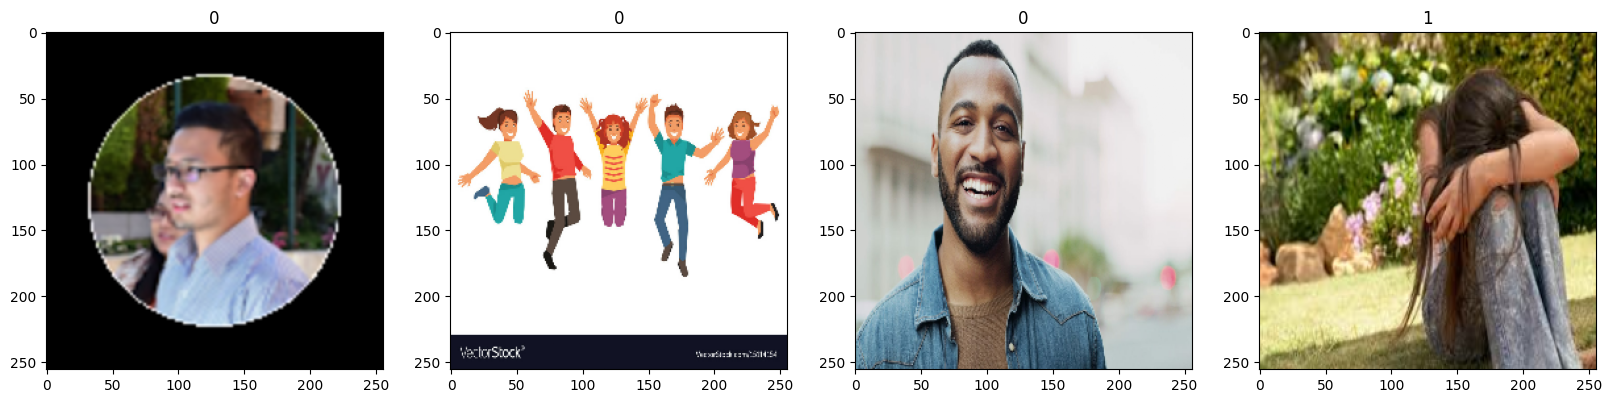

In [180]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [181]:
len(data)

8

In [182]:
train_datasize = int(len(data)*.7)
val_datasize = int(len(data)*.2)+1
test_datasize = int(len(data)*.1)+1

In [183]:
train_datasize

5

In [184]:
val_datasize

2

In [185]:
test_datasize

1

In [186]:
train_datasize + val_datasize + test_datasize

8

In [187]:
train = data.take(train_datasize)
val = data.skip(train_datasize).take(val_datasize)
test = data.skip(train_datasize+val_datasize).take(test_datasize)

In [188]:
len(test)

1

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [190]:
MaxPooling2D??

In [191]:
model = Sequential()

In [192]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [193]:
# tf.optimizers.          (Choose other optimizers if needed, but in this, using "adam" optimizer.)

In [194]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [195]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [196]:
logdir='logs'

In [197]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [198]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 10s 1s/step - loss: 0.6838 - accuracy: 0.6500 - val_loss: 0.6254 - val_accuracy: 0.6719
Epoch 2/20
5/5 [==============================] - 9s 1s/step - loss: 0.6131 - accuracy: 0.6687 - val_loss: 0.5664 - val_accuracy: 0.6562
Epoch 3/20
5/5 [==============================] - 8s 941ms/step - loss: 0.5508 - accuracy: 0.6750 - val_loss: 0.5071 - val_accuracy: 0.6875
Epoch 4/20
5/5 [==============================] - 9s 1s/step - loss: 0.4762 - accuracy: 0.7750 - val_loss: 0.4442 - val_accuracy: 0.7656
Epoch 5/20
5/5 [==============================] - 8s 908ms/step - loss: 0.4284 - accuracy: 0.8188 - val_loss: 0.3309 - val_accuracy: 0.8594
Epoch 6/20
5/5 [==============================] - 8s 1s/step - loss: 0.3359 - accuracy: 0.8687 - val_loss: 0.2910 - val_accuracy: 0.9375
Epoch 7/20
5/5 [==============================] - 7s 922ms/step - loss: 0.2981 - accuracy: 0.8625 - val_loss: 0.2482 - val_accuracy: 0.8750
Epoch 8/20
5/5 [===============

In [199]:
hist.history

{'loss': [0.683752179145813,
  0.6131334900856018,
  0.5508140325546265,
  0.47617149353027344,
  0.4283792972564697,
  0.33593395352363586,
  0.2981361448764801,
  0.2592312693595886,
  0.19996951520442963,
  0.2752757668495178,
  0.17109628021717072,
  0.1329943835735321,
  0.09829559177160263,
  0.09855203330516815,
  0.13035979866981506,
  0.08669149875640869,
  0.06292890012264252,
  0.06302138417959213,
  0.035108886659145355,
  0.06090770289301872],
 'accuracy': [0.6499999761581421,
  0.668749988079071,
  0.675000011920929,
  0.7749999761581421,
  0.8187500238418579,
  0.8687499761581421,
  0.862500011920929,
  0.90625,
  0.90625,
  0.8812500238418579,
  0.9437500238418579,
  0.987500011920929,
  0.949999988079071,
  0.9624999761581421,
  0.956250011920929,
  0.9750000238418579,
  0.9750000238418579,
  0.96875,
  0.9750000238418579,
  0.956250011920929],
 'val_loss': [0.6254298090934753,
  0.56644606590271,
  0.5070533752441406,
  0.4441779851913452,
  0.33094364404678345,
  0.2

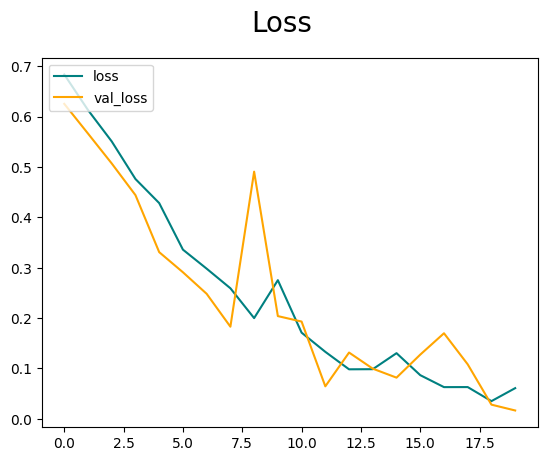

In [200]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


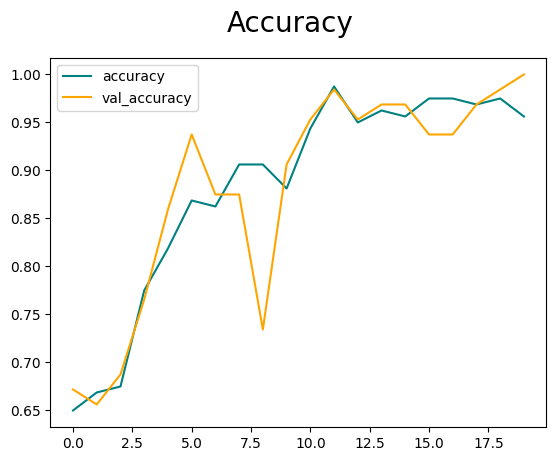

In [201]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [202]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [203]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [204]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 402ms/step


In [205]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [206]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [271]:
data_dir = '/content/drive/MyDrive/data'
os.listdir(data_dir)

['sad_people', 'happy_people', 'test']

In [272]:
img = cv2.imread(os.path.join(data_dir, 'test', 'happy_test2.jpg'))

<function matplotlib.pyplot.show(close=None, block=None)>

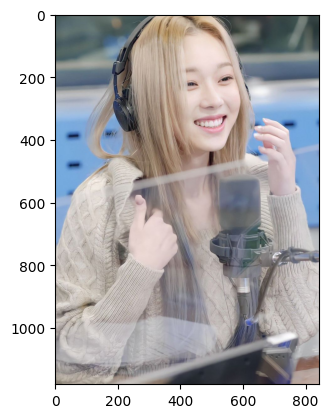

In [273]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

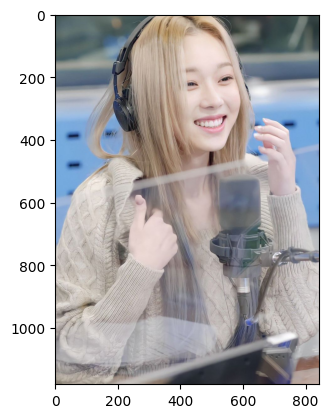

In [274]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(data_dir, 'test', 'happy_test2.jpg'))

# Check if the image was loaded correctly
if img is not None:
    # Convert the BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print("Error loading the image.")

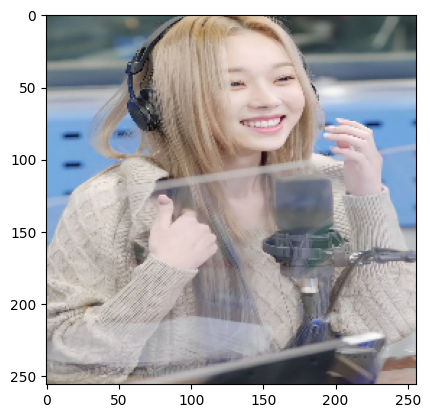

In [275]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [276]:
resize.shape

TensorShape([256, 256, 3])

In [277]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [278]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [279]:
yhat

array([[0.34177944]], dtype=float32)

In [280]:
if yhat < 0.5:
  print("Predicted class is Happy.")
else:
  print("Predicted class is Sad.")

Predicted class is Happy.


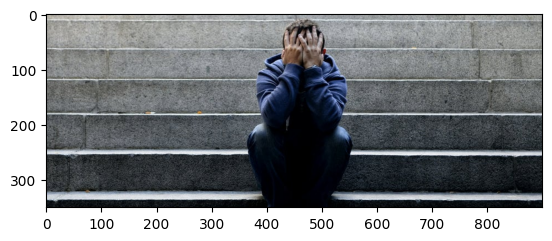

In [281]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(data_dir, 'test', 'sad_test2.jpg'))

# Check if the image was loaded correctly
if img is not None:
    # Convert the BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print("Error loading the image.")

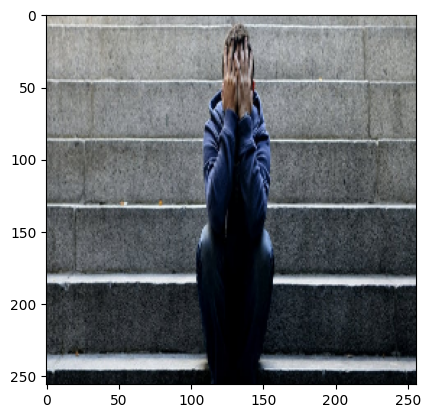

In [282]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [283]:
yhat = model.predict(np.expand_dims(resize/255, 0))

yhat

if yhat < 0.5:
  print("Predicted class is Happy.")
else:
  print("Predicted class is Sad.")

1/1 [==============================] - 0s 20ms/step
Predicted class is Sad.


In [284]:
yhat


array([[0.99994016]], dtype=float32)

In [285]:
from tensorflow.keras.models import load_model

In [286]:
model.save(os.path.join(data_dir, 'models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [288]:
new_model = load_model(os.path.join(data_dir, 'models','imageclassifier.h5'))

In [289]:
new_model

In [291]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))
if yhat_new < 0.5:
  print("Predicted class is Happy.")
else:
  print("Predicted class is Sad.")

1/1 [==============================] - 0s 29ms/step
Predicted class is Sad.
